In [1]:
from dtwhaclustering.dtw_analysis import dtw_signal_pairs, dtw_clustering, noise_robustness_test
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from dtaidistance import dtw
import pandas as pd
import os
%matplotlib inline 

# default matplotlib parameters
import matplotlib
# font = {'family': 'Times',
#         'weight': 'bold',
#         'size': 22}

# matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (12, 6)
plt.style.use('ggplot')
import seaborn as sns
import ipyplot

import os
import sys
sys.stderr = open(os.devnull, "w")  # silence stderr

In [2]:
#load pickle data
dataloc = "pickleFiles"

final_dU=pd.read_pickle(os.path.join(dataloc,"dU_wo_seasn.pickle"))
final_dN=pd.read_pickle(os.path.join(dataloc,"dN_wo_seasn.pickle"))
final_dE=pd.read_pickle(os.path.join(dataloc,"dE_wo_seasn.pickle"))

In [3]:
final_dU.head()

,DAWU_U,GS36_U,CTOU_U,HSIN_U,GS31_U,SSUN_U,SFON_U,GS23_U,VR03_U,SLNP_U,...,DOSH_U,W029_U,NSHE_U,HUWE_U,SHJU_U,DNAN_U,PKGM_U,SLIN_U,MESN_U,WULU_U
Time,,,,,,,,,,,,,,,,,,,,,
2007-01-01,3.908294,-0.081488,-3.049840,-4.673059,10.533776,-1.476313,8.673984,4.530060,13.409948,-8.877830,...,-19.377178,-3.788125,1.743015,130.023461,8.220618,66.794490,-30.720817,-3.034473,-3.599844,-57.474679
2007-01-02,10.500799,7.948431,1.318779,-0.743764,9.331000,3.753709,6.669562,4.629491,22.623746,3.637930,...,-8.896452,-6.097189,8.503721,137.846113,13.530092,70.849086,-24.866085,-12.179227,-14.733458,-47.341336
2007-01-03,4.008854,6.446352,4.105762,12.184217,9.198563,7.073537,6.987663,13.166624,12.013241,-4.880878,...,-22.097870,9.628858,2.767164,138.107636,16.818000,72.697599,-19.829117,-21.627860,-11.893865,-51.522350
2007-01-04,-0.031345,-0.846752,0.427601,-3.944638,6.705640,-2.433624,6.980915,5.301272,14.671148,-12.261464,...,-18.980924,-11.738634,-0.707047,129.183137,2.833268,66.621516,-31.362671,-29.660110,-19.988452,-59.711777
2007-01-05,-3.235729,2.166184,-3.995197,-6.788471,6.111140,-2.830265,-0.087687,3.937724,14.986668,-6.464705,...,-17.883469,-8.798023,-1.576212,128.433947,-2.769286,68.346757,-28.545909,-29.302730,-39.140370,-84.028366


0.01 0.0
0.05 0.8695652173913043
0.08 1.7391304347826086
0.1 0.0
0.15 0.8695652173913043
0.2 3.4782608695652173
0.3 6.086956521739131
0.4 3.4782608695652173
0.5 6.086956521739131
1 7.82608695652174
1.5 13.91304347826087
2 10.434782608695652
2.5 13.91304347826087
3 13.043478260869565
4 20.0
6 16.52173913043478
8 21.73913043478261
10 28.695652173913043
15 22.608695652173914
20 30.434782608695656
0.01 0.0
0.05 0.0
0.08 0.0
0.1 0.0
0.15 1.7391304347826086
0.2 0.8695652173913043
0.3 0.8695652173913043
0.4 3.4782608695652173
0.5 4.3478260869565215
1 9.565217391304348
1.5 13.043478260869565
2 13.043478260869565
2.5 18.26086956521739
3 17.391304347826086
4 15.65217391304348
6 25.217391304347824
8 26.08695652173913
10 23.47826086956522
15 27.82608695652174
20 28.695652173913043
0.01 0.0
0.05 0.8695652173913043
0.08 0.8695652173913043
0.1 0.0
0.15 1.7391304347826086
0.2 2.608695652173913
0.3 2.608695652173913
0.4 0.8695652173913043
0.5 3.4782608695652173
1 7.82608695652174
1.5 14.782608695652174

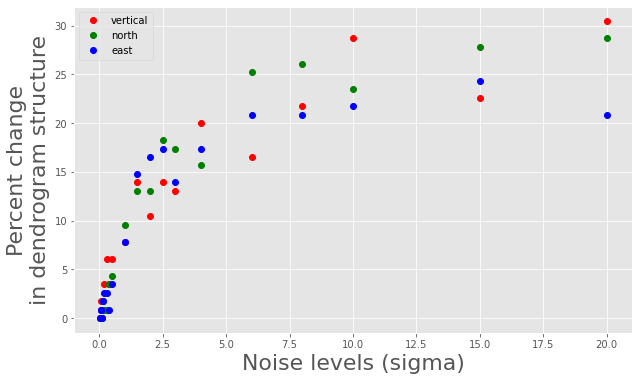

In [4]:
sigma_vals = [0.01, 0.05, 0.08, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2, 2.5, 3, 4, 6, 8, 10, 15, 20]


fig, ax = plt.subplots(figsize=(10,6))
for sigma in sigma_vals:
    percent_change = noise_robustness_test(final_dU,scale=sigma)
    print('vertical->', sigma, percent_change)
    ax.plot(sigma, percent_change, 'or')
    
for sigma in sigma_vals:
    percent_change = noise_robustness_test(final_dN,scale=sigma)
    print('north->',sigma, percent_change)
    ax.plot(sigma, percent_change, 'og')
    
for sigma in sigma_vals:
    percent_change = noise_robustness_test(final_dE,scale=sigma)
    print('east->',sigma, percent_change)
    ax.plot(sigma, percent_change, 'ob')
    
ax.plot([], [], 'or', label='vertical')
ax.plot([], [], 'og', label='north')
ax.plot([], [], 'ob', label='east')

ax.set_xlabel('Noise levels (sigma)', fontsize=22)
ax.set_ylabel('Percent change\nin dendrogram structure', fontsize=22)
plt.legend()
plt.savefig('Figures/noise_robustness_test.pdf', bbox_inches='tight')